<a href="https://colab.research.google.com/github/fora22/Data_Science/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정 트리(Decision Tree)
결정 트리는 SVM처럼 분류, 회귀 작업 그리고 다중 출력 작업도 가능한 다재다능한 머신러닝 알고리즘이다. 또한 매우 복잡한 데이터셋도 학습할 수 있는 강력한 알고리즘이다.

결정 트리는 랜덤 포레스트의 기본 구성 요소이기도 하다.

In [1]:
# 그래프 한글 폰트 설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname = path, size = 10).get_name()
print(font_name)
plt.rc('font', family=font_name)  
fm._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 148486 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothic


In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = load_iris()
X = iris.data[:,2:] # 꽃잎의 길이와 너비
y = iris.target

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [5]:
from sklearn.tree import export_graphviz

In [6]:
image_path = '/content/drive/MyDrive/Colab Notebooks/Data_Science/img Decision Tree/'
export_graphviz(
    tree_clf,
    out_file = image_path +"iris_tree.dot",
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

In [7]:
import pydot
(graph, ) = pydot.graph_from_dot_file(image_path + 'iris_tree.dot', encoding = 'utf-8')

In [8]:
graph.write_png(image_path + 'iris_tree.png')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


[Text(133.92000000000002, 181.2, 'X[1] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


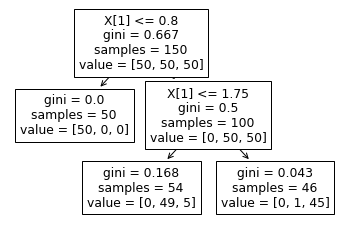

In [9]:
from sklearn import tree
tree.plot_tree(tree_clf)

# Tree 해석
- 여기서 sample은 각 노드별로 얼마나 많은 훈련 샘플이 적용되었는지를 나타낸다.
- value 속성은 노드에서 각 클래스에 얼마나 많은 훈련 샘플이 있는지 알려준다.
    - 예를 들어 맨 오른쪽 아래 노드는 setosa가 0개, versicolor가 1개, virginica 가 45개이다.
- gini는 불순도 속성으로 샘플이 같은 클래스에 속하는 정도를 나타낸다.
- 예를 들어 깊이 1의 왼쪽 노드는 setosa만 가지고 있으므로 순수 노드이고 gini가 0이다.
* 예를 들어 깊이 2의 왼쪽 노드의 gini 점수는 $1-(\frac{0}{54})^2 - (\frac{49}{54})^2 \approx 0.168$이다.

### 지니 불순도
$G_i = 1 - \sum^{n}_{k=1} p_{i,k}^2 $

![image](https://user-images.githubusercontent.com/48875566/128590116-673863de-bb6b-4965-ba04-544852848b6b.png)

[그림 출처](https://hoony-gunputer.tistory.com/entry/%ED%95%B8%EC%A6%88%EC%98%A8-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-6%EA%B0%95-%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC-Decision-tree?category=742600)
# 화이트 박스와 블랙박스
결정트리는 결정 방식을 눈으로 볼 수 있고 이해하기 쉽다. 이를 **화이트 박스** 모델이라고 하는데, 반대로 랜덤 포레스트나 신경망은 **블랙 박스** 모델이라고 한다. 이 알고리즘들은 성능이 띄어나지만 예측 하는 과정을 설명하기 어렵다.
 


# 클래스 확률 추정
결정 트리는 한 샘플이 특정 클래스 $k$에 속할 확률을 추정할 수도 있다. 먼저 이 샘플에 대해 리프 노드를 찾기 위해 트리를 탐색하고 그 노드에 있는 클래스 $k$의 후련 샘플의 비율을 반환한다.

In [10]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [11]:
tree_clf.predict([[5,1.5]])

array([1])

# CART 훈련 알고리즘
sklearn은 결정 트리를 훈련시키기 위해 CART(Classification And Regression Tree) 알고리즘을 사용한다. 알고리즘 아이디어는 다음과 같다.

먼저 훈련 세트를 하나의 특성 $k$의 임곗값 $t_k$를 사용해 두 개의 서브셋으로 나눈다(예를 들면 꽃잎의 길이 <= 2.45cm). 이 때 알고리즘은 (크기에 따른 가중치가 적용된) 가장 순수한 서브셋으로 나눌 수 있는 ($k, t_k$) 짝을 찾는다. 이 알고리즘이 최소화해야 하는 비용 함수는 다음과 같다.

### 분류에 대한 CART 비용 함수
$J(k, t_k) = \frac{m_left}{m} G_{left} + \frac{m_right}{m}G_{rigth}$

$G_{left/right}$는 왼쪽/오른쪽 서브셋의 불순도

$m_{left/right}$는 왼쪽/오른쪽 서브셋의 샘플 수

## 알고리즘
CART 알고리즘은 탐욕적 알고리즘(greedy algorithm)이다. 루트 노드에서부터 최적의 분할을 찾으며 각 단계에서 이를 반복한다. 탐욕적 알고리즘이기 때문에 최적의 솔루션을 보장하지는 않는다.

최적의 트리를 찾는 것은 NP-완전 문제로 알려져 있다.

# 계산 복잡도
## 예측 복잡도
예측을 하려면 결정 트리를 루트 노드에서부터 리프 노드 까지 탐색해야 한다. 일반적으로 결정 트리는 거의 균형을 이루고 있으므로 결정 트리를 탐색하기 위해서는 약 $O(log_2(m))$개의 노드를 거쳐야 한다.

따라서 예측 복잡도는 특성 수와 무관하게 $O(log_2(m))$이다. 따라서 큰 훈련세트를 다룰 때도 예측속도가 매우 빠르다.
## 훈련 복잡도
그러나 훈련 알고리즘은 각 노드에서 모든 훈련 샘플의 모든 특성을 비교하므로 복잡도는 $O(n \times m log(m))$이다.

<br>
훈련 세트가 (수천개 이하의 샘플 정도로) 작을 경우 사이킷런은 (presort=True로 지정하면) 미리 데이터를 정렬하여 훈련 속도를 높일 수 있다. 하지만 훈련 세트가 클 경우에는 속도가 많이 느려진다.

# 지니 불손도 또는 엔트로피
기본적으로 지니 불순도가 사용되지만 `criterion` 매개변수를 `entropy`로 지정하여 엔트로피 불손도를 사용할 수 있다. 예를 들어 위 그림의 깊이 2의 왼쪽 노드의 엔트로피는 $-\frac{49}{54}log_2 (\frac{49}{54}) -\frac{5}{54}log_2 (\frac{5}{54}) \approx 0.445$

$$ H_i = - \sum_{k=1}^{n} p_{i,k} log_2(p_{i,k}), \quad p_{i,k} \ne 0$$

## 지니 불손도와 엔트로피의 특징
* 실제로 큰 차이는 없음
* 지니 불순도가 조금 더 계산이 빠르기 때문에 기본값으로 좋음
* 다만, 지니 불손도가 가장 빈도 높은 클래스를 한쪽 가지로 고립시키는 경향이 있음
* 반면, 엔트로피는 조금 더 균형 잡힌 트리를 만듬

# 규제 매개변수
결정 트리는 훈련 데이터에 대한 제약사항이 거의 없다. 반대로 선형 모델은 데이터가 꼭 선형일 거라 가정한다. 다만, 제한을 두지 않으면 트리가 훈련 데이터에 아주 가깝게 맞추려고 해서 대부분 과대적합되기 쉽다

결정 트리는 모델 파라미터가 전혀 없는 것이 아니라 훈련되기 전에 파라미터 수가 결정되지 않기 때문에 이런 모델을 **비파라미터 모델(nonparametric model)**이라고 부른다. 따라서 모델 구조가 데이터에 맞춰져서 고정되지 않고 자유롭다. 반대로 선형 모델 같은 **파라미터 모델(parametric model)은 미리 정의된 모델 파라미터수를 가지므로 자유도가 제한되고 과대적합될 위험이 줄어든다.

sklearn에서는 결정 트리의 최대 깊이를 제어할 수 있다. sklearn의 `max_depth` 매개변수로 이를 조절한다. 기본값은 제한이 없는 것을 의미하는 `None`이다. `max_depth`를 줄이면 모델을 규제하게 되고 과대적합의 위험이 감소한다.

`DecisionTreeClassfier`에는 다른 제한 매개변수가 몇 가지 있다.
* min_samples_split : 분할되기 위해 노드가 가져야 하는 최소 샘플 수
* min_samples_leaf : 리프 노드가 가지고 있어야 할 최소 샘플 수
* min_weight_fraction_leaf : min_samples_leaf와 같지만 가중치가 부여된 전체 샘플 수에서의 비율
* max_leaf_nodes : 리프 노드의 최대 수
* max_features : 각 노드에서 분할에 사용할 특성의 최대 수

![image](https://user-images.githubusercontent.com/48875566/130359947-f30bf3d2-9f00-4e7d-b1c4-063c1212f521.png)
[그림 출처](https://hoony-gunputer.tistory.com/entry/%ED%95%B8%EC%A6%88%EC%98%A8-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-6%EA%B0%95-%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC-Decision-tree?category=742600)

왼쪽 그림은 규제가 없고, 오른쪽은 리프 노드의 최소 샘플 수를 4로 제한하여 과대적합을 피한 모습이다. 왼쪽의 그래프는 특별한 데이터에서 특이값을 보여주고 있다.

# 회귀
결정 트리는 회귀 문제에도 사용할 수 있다.

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

![image](https://user-images.githubusercontent.com/48875566/130360122-f3063f6a-391b-423f-adfc-b256612faf73.png)

[그림 출처](https://hoony-gunputer.tistory.com/entry/%ED%95%B8%EC%A6%88%EC%98%A8-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-6%EA%B0%95-%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC-Decision-tree?category=742600)

분류와 달리 클래스로 나오는 것이 아니라 숫자로 결과가 나오게 된다. 분류에서는 불순율을 줄이기 위해 파라미터 등을 통해서 제약을 줬는데 회귀에서는 mse를 최소로 하기 위해서 훈련을 진행한다.

![image](https://user-images.githubusercontent.com/48875566/130360244-18c3dd1a-3f18-4495-b431-d553b16ec179.png)

[그림 출처](https://hoony-gunputer.tistory.com/entry/%ED%95%B8%EC%A6%88%EC%98%A8-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-6%EA%B0%95-%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC-Decision-tree?category=742600)

왼쪽 그림은 과대적합되었고, 규제를 추가하여 그럴싸한 모델이 완성된다.

# 불안정성

![image](https://user-images.githubusercontent.com/48875566/130360299-cf3c4345-5da0-4ecc-b526-7f0cb0a9d52f.png)

[그림 출처](https://hoony-gunputer.tistory.com/entry/%ED%95%B8%EC%A6%88%EC%98%A8-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-6%EA%B0%95-%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC-Decision-tree?category=742600)

결정 트리는 이해하고 해석하기 쉬우며, 사용하기 편하고, 여러 용도로 사용할 수 있고, 성능도 뛰어나다. 하지만 몇 가지 제한사항이 있다. 일단 결정 트리는 계단 모양의 **결정 경계를 만든다**. 모든 분할은 축에 수직이다. 따라서 훈련 세트의 회전에 민감하다. 왼쪽 그림의 경우 쉽게 데이터 셋을 구분하지만, 데이터 셋을 45도 회전한 오른쪽 그림의 경우 불필요하게 구불구불해졌다.

이 문제를 해결하는 것은 훈련 데이터를 더 좋은 방향으로 회전시키는 PCA 기법을 사용하는 것이다.

결정 트리의 주된 문제는 작은 변화에도 매우 민감하다는 것이다. 이러한 문제점들은 랜덤 포레스트에서 많은 트리가 만든 예측을 평균하여 이러한 불안정성을 극복한다.